In [683]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

   Average Wind Speed  PRCP  TMAX  TMIN  Fastest 2 minute wind speed  \
0                4.25  0.00  15.0 -11.0                         10.1   
1                8.72  0.00  15.0  -2.0                         19.9   
2                7.16  0.00  17.0   8.0                         16.1   
3                3.13  0.02  11.0 -20.0                          8.1   
4                4.92  0.00  11.0 -17.0                         17.0   

   Fastest 5 second wind speed  Fog/Ice  Heavy/Freezing Fog  Thunder  \
0                         14.1      0.0                 0.0      0.0   
1                         25.9      0.0                 0.0      0.0   
2                         19.9      0.0                 0.0      0.0   
3                         11.0      1.0                 0.0      0.0   
4                         21.0      0.0                 0.0      0.0   

   Smoke/Haze  Power Outage  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0 

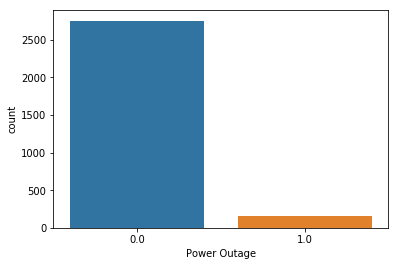

In [684]:
df = pd.read_csv('data.csv');
df = df.fillna(0);
df = df.drop(['DATE'], axis = 1);
print(df.head());
sns.countplot(x="Power Outage",data=df);
plt.show();

In [685]:
#Add column for Delta T Max
temp = pd.Series(df.iloc[:,2]);
deltaTemp = pd.Series(df.iloc[:,2]);
deltaTemp[0] = 0;
for i in range (1, temp.shape[0]):
    deltaTemp[i] = temp[i] - temp[i-1];
df['Delta T Max'] = pd.Series(np.square(deltaTemp));

In [686]:
#Add column for Delta T min
temp = pd.Series(df.iloc[:,3]);
deltaTemp = pd.Series(df.iloc[:,3]);
deltaTemp[0] = 0;
for i in range (1, temp.shape[0]):
    deltaTemp[i] = temp[i] - temp[i-1];
df['Delta T Min'] = pd.Series(np.square(deltaTemp));

In [687]:
#Add columns for wind speed squared terms
df['Avg Wind Speed Squared'] = pd.Series(np.square(df['Average Wind Speed']), index=df.index)
df['5 second wind speed squared'] = pd.Series(np.square(df['Fastest 5 second wind speed']));
df['2 min wind speed squared'] = pd.Series(np.square(df['Fastest 2 minute wind speed']));

In [688]:
df = df[['Power Outage', 'PRCP', 'Delta T Max', 'Delta T Min', 'Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice', 'Heavy/Freezing Fog', 'Thunder', 'Smoke/Haze']];

In [689]:
#Normalize all the data
from sklearn import preprocessing

scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);
df.describe()

,Power Outage,PRCP,Delta T Max,Delta T Min,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,0.054639,0.019899,0.448535,0.217197,0.133314,0.057726,0.031864,0.344674,0.100344,0.053265,0.150172
std,0.227314,0.056304,0.292105,0.219058,0.128751,0.059636,0.071300,0.475343,0.300509,0.224599,0.357301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.165847,0.021786,0.045024,0.028859,0.010548,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.496130,0.164758,0.097886,0.041951,0.016690,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.007500,0.684559,0.370706,0.180098,0.069620,0.028260,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [690]:
#Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size = 0.33, random_state = 99);
X_train.describe()

,PRCP,Delta T Max,Delta T Min,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,0.019682,0.447827,0.217223,0.132838,0.057614,0.032384,0.332991,0.100564,0.051308,0.149820
std,0.056690,0.293458,0.220844,0.124357,0.055852,0.076321,0.471404,0.300828,0.220683,0.356987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.130401,0.020711,0.045024,0.028859,0.010548,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.496130,0.161776,0.097886,0.041951,0.016690,0.000000,0.000000,0.000000,0.000000
75%,0.007500,0.684559,0.370706,0.180098,0.069620,0.028260,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.959781,0.905937,1.000000,1.000000,1.000000,1.000000,1.000000


In [691]:
#Undersample the number of zeroes
import pandas_ml as pdml
df_ML = pdml.ModelFrame(X_train, target = y_train)
print("Before sampling ratio");
print(df_ML.target.value_counts());
#use ratio = 0.5 to change ratio
sampler = df_ML.imbalance.under_sampling.RandomUnderSampler(ratio=0.1);
df_ML = df_ML.fit_sample(sampler);
print("Final counts after undersampling the zeroes");
print(df_ML.target.value_counts());
X_train = df_ML.iloc[:,1:];
y_train = df_ML['Power Outage'];
df_ML.head()

Before sampling ratio
0.0    1836
1.0     113
Name: Power Outage, dtype: int64
Final counts after undersampling the zeroes
0.0    1130
1.0     113
Name: Power Outage, dtype: int64


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


,Power Outage,PRCP,Delta T Max,Delta T Min,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice,Heavy/Freezing Fog,Thunder,Smoke/Haze
0,0.0,0.1500,0.340278,0.167767,0.124961,0.047556,0.016690,1.0,1.0,0.0,0.0
1,0.0,0.0075,0.471293,0.517763,0.014639,0.021253,0.008444,1.0,0.0,0.0,1.0
2,0.0,0.0000,0.800741,0.011451,0.331339,0.097374,0.037867,0.0,0.0,0.0,0.0
3,0.0,0.0025,0.420954,0.339919,0.139738,0.047556,0.016690,1.0,0.0,0.0,1.0
4,0.0,0.0000,0.415820,0.244496,0.180098,0.064015,0.022907,1.0,0.0,0.0,1.0


In [692]:
#Oversampling the number of ones
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=44, ratio=1);
X_train, y_train = sampler.fit_sample(X_train, y_train);

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [693]:
#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 123);
rf.fit(X_train, y_train);

In [694]:
#Predict results
pred = rf.predict(X_test);

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);

Accuracy:  0.894901144641


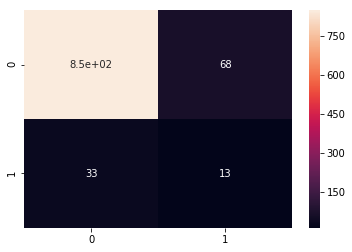

In [695]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()

In [696]:
#Penalized SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=5.0);
clf.fit(X_train, y_train);
pred = clf.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='weighted'));
print(accuracy);

f1 score:  0.701030192749
0.588969823101


In [697]:
arr = list(y_train > 0);
test = [];
for i in arr:
    if (i==False):
        test.append(1);
    else:
        test.append(20);
        

In [698]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True);
plt.savefig('Penalized SVM');
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));

               precision    recall  f1-score   support

  Normal Days       0.98      0.58      0.73       915
Power Outages       0.09      0.78      0.15        46

  avg / total       0.94      0.59      0.70       961



f1 score:  0.673332959184
0.555671175858


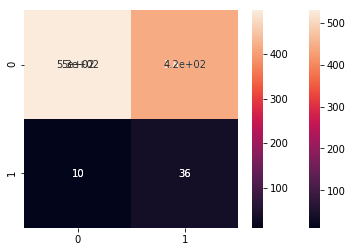

               precision    recall  f1-score   support

  Normal Days       0.98      0.54      0.70       915
Power Outages       0.08      0.78      0.14        46

  avg / total       0.94      0.56      0.67       961



In [699]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 200, random_state = 123);
clf.fit(X_train, y_train, sample_weight = test);
pred = clf.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='weighted'))
print(accuracy);

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));

Accuracy:  0.23517169615
[ 0.12  0.08  0.11  0.1   0.43  0.15  0.    0.    0.01  0.  ]


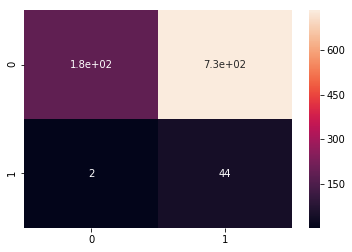

               precision    recall  f1-score   support

  Normal Days       0.99      0.20      0.33       915
Power Outages       0.06      0.96      0.11        46

  avg / total       0.94      0.24      0.32       961



In [700]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100);

clf.fit(X_train, y_train, sample_weight=test);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


0.838495575221239
Best parameters: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 150}
Accuracy:  0.824141519251
[ 0.1382967   0.13257524  0.16732889  0.11659149  0.1287616   0.26258449
  0.02814206  0.00952332  0.00615503  0.01004117]


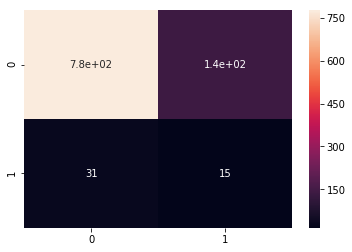

               precision    recall  f1-score   support

  Normal Days       0.96      0.85      0.90       915
Power Outages       0.10      0.33      0.15        46

  avg / total       0.92      0.82      0.87       961



In [701]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 75 ,100, 150]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_search_ABC.fit(X_train, y_train);
print(grid_search_ABC.best_score_);
print('Best parameters: {}'.format(grid_search_ABC.best_params_));
clf = grid_search_ABC.best_estimator_;


clf.fit(X_train, y_train);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


0.587633642195


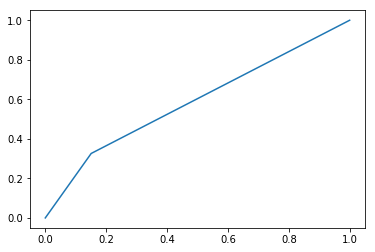

               precision    recall  f1-score   support

  Normal Days       0.96      0.85      0.90       915
Power Outages       0.10      0.33      0.15        46

  avg / total       0.92      0.82      0.87       961



In [702]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pred));
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred);
roc_auc = auc(fpr, tpr);
plt.plot(fpr, tpr);
plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


Accuracy for cross validation run: 
f1 score:  0.526334516459
Accuracy: 0.91 (+/- 0.01) [Random Forest]
f1 score:  0.526334516459
Accuracy: 0.84 (+/- 0.06) [Gradient Boost]
f1 score:  0.526334516459
Accuracy: 0.88 (+/- 0.05) [Ensemble]
Accuracy for test data
Accuracy:  0.824141519251


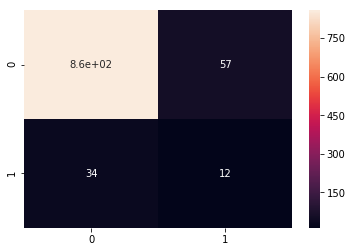

In [703]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.ensemble import VotingClassifier

clf4 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345)
clf5 = GradientBoostingClassifier(n_estimators = 200, learning_rate=1, max_depth=1, random_state=123)

eclf = VotingClassifier(estimators=[ ('rforest', clf4), ('gboost', clf5)], voting = 'hard');

print("Accuracy for cross validation run: ");
for clf, label in zip([clf4, clf5, eclf], ['Random Forest', 'Gradient Boost', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro');
    print("f1 score: ", f1_score(y_test, pred, average='macro'))
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label));
eclf = eclf.fit(X_train,y_train, sample_weight = test);
from sklearn.metrics import confusion_matrix
pred = eclf.predict(X_test);
cm = pd.DataFrame(confusion_matrix(y_test, pred));
print("Accuracy for test data");
sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();

Done
Accuracy:  0.902185223725
f1 score:  0.912837010405


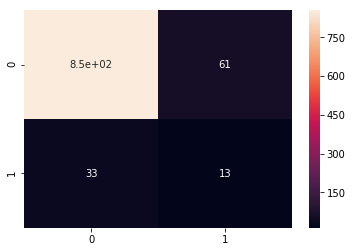

In [704]:
#Train a weighted random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 123);
rf.fit(X_train, y_train, sample_weight = test);
print("Done");
pred = rf.predict(X_test);
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);
print("f1 score: ", f1_score(y_test, pred, average='weighted'));
cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()

In [705]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


               precision    recall  f1-score   support

  Normal Days       0.96      0.93      0.95       915
Power Outages       0.18      0.28      0.22        46

  avg / total       0.93      0.90      0.91       961



Optimal K value is :  1
Misclassification error at that value is  0.13407079646


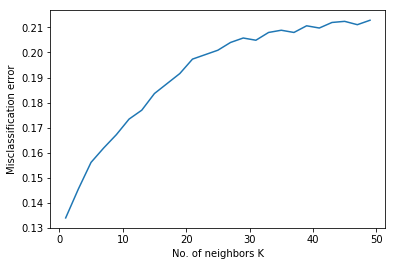

In [706]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
checkKValue = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 !=0, checkKValue))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]
optimalK = neighbors[MSE.index(min(MSE))]
print("Optimal K value is : ", optimalK);
print("Misclassification error at that value is ", min(MSE));
plt.plot(neighbors, MSE)
plt.xlabel('No. of neighbors K')
plt.ylabel('Misclassification error')
plt.show()

Accuracy:  0.805411030177


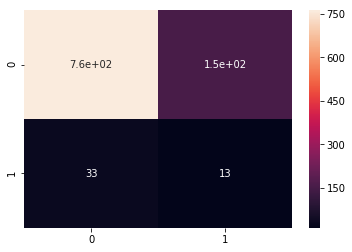

               precision    recall  f1-score   support

  Normal Days       0.96      0.83      0.89       915
Power Outages       0.08      0.28      0.12        46

  avg / total       0.92      0.81      0.85       961



In [707]:
knn = KNeighborsClassifier(n_neighbors=optimalK);
knn.fit(X_train, y_train);
pred = knn.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("Accuracy: ", accuracy);
# from sklearn.metrics import confusion_matrix
# con_mat = confusion_matrix(y_test, pred, [0, 1])
# print(con_mat)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));
